# 实验二：中国股市单因子资产定价模型的实证检验

## 多资产部分

### 数据导入

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import chi2, f # 卡方分布和F分布的统计函数

In [2]:
stock_data1 = pd.read_csv(
    '../../实验二/assets/data/market/568_2001-2010.csv',
    encoding='gbk',
    usecols=[0, 1, 5, 10] # 股票代码、日期、收盘价和日无风险收益率
)
stock_data1

,股票代码_Stkcd,日期_Date,收盘价_Clpr,日无风险收益率_DRfRet
0,568,2001/1/2,12.70,0.000054
1,568,2001/1/3,13.00,0.000054
2,568,2001/1/4,12.94,0.000054
3,568,2001/1/5,13.41,0.000054
4,568,2001/1/8,13.38,0.000054
...,...,...,...,...
12179,600809,2010/12/27,66.13,0.000125
12180,600809,2010/12/28,67.47,0.000126
12181,600809,2010/12/29,69.08,0.000127
12182,600809,2010/12/30,68.00,0.000127


In [3]:
stock_data2 = pd.read_csv(
    '../../实验二/assets/data/market/568_2011-2015.csv',
    encoding='gbk',
    usecols=[0, 1, 5, 10]
)

stock_data3 = pd.read_csv(
    '../../实验二/assets/data/market/568_2016-2018.csv',
    encoding='gbk',
    usecols=[0, 1, 5, 10]
)

In [4]:
# 合并数据
stock_data = pd.concat(
    [stock_data1, stock_data2],
    ignore_index = True, # 重新生成索引，避免索引重复
)

stock_data = pd.concat(
    [stock_data, stock_data3],
    ignore_index=True
)

stock_data

,股票代码_Stkcd,日期_Date,收盘价_Clpr,日无风险收益率_DRfRet
0,568,2001/1/2,12.70,0.000054
1,568,2001/1/3,13.00,0.000054
2,568,2001/1/4,12.94,0.000054
3,568,2001/1/5,13.41,0.000054
4,568,2001/1/8,13.38,0.000054
...,...,...,...,...
21957,600809,2018/12/24,36.85,0.000088
21958,600809,2018/12/25,36.44,0.000090
21959,600809,2018/12/26,35.66,0.000091
21960,600809,2018/12/27,35.03,0.000091


In [5]:
# 重命名列
stock_data.columns = ['code', 'date', 'close', 'rf']
# 删除缺失值
stock_data.dropna(inplace=True)
# 按代码排序
# inplace=True: 原地排序，即直接在原dataframe上修改
stock_data.sort_values(
    by='code',
    inplace=True
)

stock_data

,code,date,close,rf
0,568,2001/1/2,12.70,0.000054
12692,568,2013/1/24,32.77,0.000106
12693,568,2013/1/25,31.66,0.000106
12694,568,2013/1/28,30.11,0.000106
12695,568,2013/1/29,30.46,0.000106
...,...,...,...,...
17077,600809,2011/1/13,62.16,0.000114
17076,600809,2011/1/12,60.80,0.000115
17075,600809,2011/1/11,61.38,0.000117
17157,600809,2011/5/17,70.00,0.000125


In [6]:
# 显示所有独特的股票代码
codes = np.unique(stock_data['code'].values)
codes

array([   568,    596,    799,    858, 600809], dtype=int64)

### 依次处理并可视化这5支股票的数据

,code,date,close,rf,r
7,568,2001/1/11,13.09,0.000054,-0.013657
8,568,2001/1/12,12.92,0.000054,-0.013072
9,568,2001/1/15,12.25,0.000054,-0.053251
10,568,2001/1/16,12.48,0.000054,0.018601
11,568,2001/1/17,12.40,0.000054,-0.006431
...,...,...,...,...,...
18948,568,2018/9/3,43.14,0.000079,-0.096490
18949,568,2018/9/4,43.30,0.000079,0.003702
18950,568,2018/9/5,42.08,0.000078,-0.028580
18951,568,2018/9/6,40.80,0.000078,-0.030890


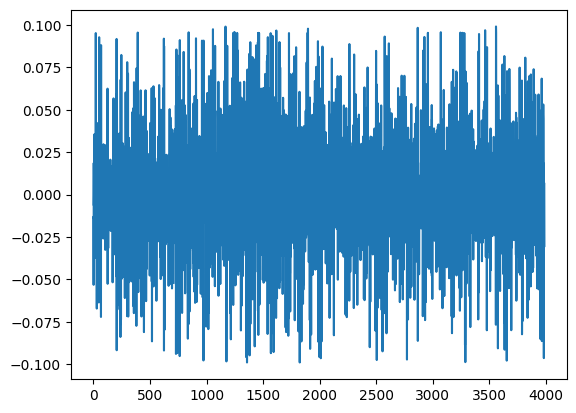

In [7]:
# 选出代码为568的股票
data_568 = stock_data[stock_data['code'] == 568].copy()
# 按日期排序
data_568.sort_values(by=['date'], inplace=True)
# 计算收益率
data_568['r'] = np.log(data_568['close']) - np.log(data_568['close'].shift())
# 删除缺失值
data_568.dropna(inplace=True)
# 去除极端值
mask = (data_568['r'] <= 0.1) & (data_568['r'] >= -0.1)
data_568 = data_568[mask]
# 绘图
plt.plot(data_568['r'].values)

data_568

,code,date,close,rf,r
2444,596,2001/1/11,27.00,0.000054,-0.007012
2445,596,2001/1/12,27.73,0.000054,0.026678
2446,596,2001/1/15,26.61,0.000054,-0.041228
2447,596,2001/1/16,26.81,0.000054,0.007488
2448,596,2001/1/17,26.40,0.000054,-0.015411
...,...,...,...,...,...
19684,596,2018/9/3,78.60,0.000079,-0.057236
19685,596,2018/9/4,78.63,0.000079,0.000382
19686,596,2018/9/5,76.01,0.000078,-0.033888
19687,596,2018/9/6,74.06,0.000078,-0.025989


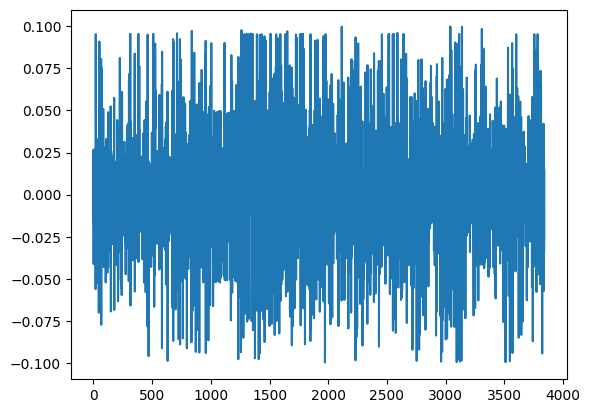

In [8]:
data_596 = stock_data[stock_data['code'] == 596].copy()
data_596.sort_values(by=['date'], inplace=True)
data_596['r'] = np.log(data_596['close']) - np.log(data_596['close'].shift())
data_596.dropna(inplace=True)
mask = (data_596['r'] <= 0.1) & (data_596['r'] >= -0.1)
data_596 = data_596[mask]
plt.plot(data_596['r'].values)

data_596

,code,date,close,rf,r
4884,799,2001/1/11,15.40,0.000054,0.007823
4885,799,2001/1/12,15.25,0.000054,-0.009788
4886,799,2001/1/15,14.72,0.000054,-0.035372
4887,799,2001/1/16,14.79,0.000054,0.004744
4888,799,2001/1/17,14.78,0.000054,-0.000676
...,...,...,...,...,...
20417,799,2018/9/3,19.47,0.000079,-0.042731
20418,799,2018/9/4,19.47,0.000079,0.000000
20419,799,2018/9/5,19.00,0.000078,-0.024436
20420,799,2018/9/6,18.58,0.000078,-0.022353


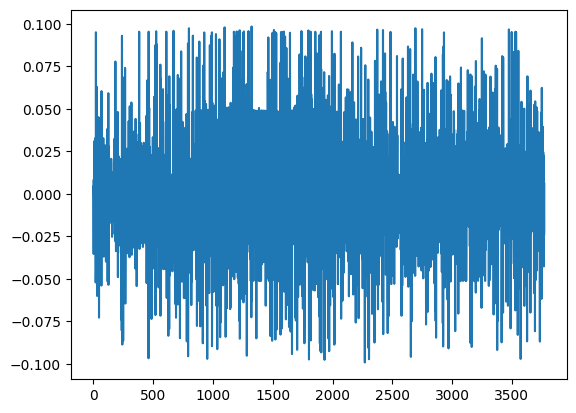

In [9]:
data_799 = stock_data[stock_data['code'] == 799].copy()
data_799.sort_values(by=['date'], inplace=True)
data_799['r'] = np.log(data_799['close']) - np.log(data_799['close'].shift())
data_799.dropna(inplace=True)
mask = (data_799['r'] <= 0.1) & (data_799['r'] >= -0.1)
data_799 = data_799[mask]
plt.plot(data_799['r'].values)

data_799

,code,date,close,rf,r
7322,858,2001/1/11,39.05,0.000054,-0.006382
7323,858,2001/1/12,38.40,0.000054,-0.016785
7324,858,2001/1/15,36.85,0.000054,-0.041202
7325,858,2001/1/16,36.89,0.000054,0.001085
7326,858,2001/1/17,36.85,0.000054,-0.001085
...,...,...,...,...,...
21150,858,2018/9/3,61.97,0.000079,-0.092122
21151,858,2018/9/4,62.77,0.000079,0.012827
21152,858,2018/9/5,60.90,0.000078,-0.030244
21153,858,2018/9/6,59.71,0.000078,-0.019734


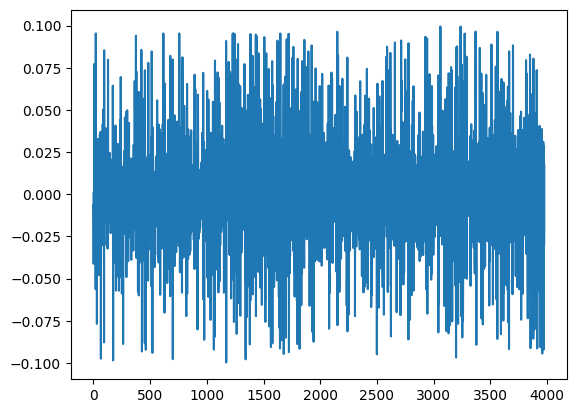

In [10]:
data_858 = stock_data[stock_data['code'] == 858].copy()
data_858.sort_values(by=['date'], inplace=True)
data_858['r'] = np.log(data_858['close']) - np.log(data_858['close'].shift())
data_858.dropna(inplace=True)
mask = (data_858['r'] <= 0.1) & (data_858['r'] >= -0.1)
data_858 = data_858[mask]
plt.plot(data_858['r'].values)

data_858

,code,date,close,rf,r
9759,600809,2001/1/11,10.03,0.000054,0.002996
9760,600809,2001/1/12,10.33,0.000054,0.029472
9761,600809,2001/1/15,9.95,0.000054,-0.037480
9762,600809,2001/1/16,9.88,0.000054,-0.007060
9763,600809,2001/1/17,9.73,0.000054,-0.015299
...,...,...,...,...,...
21883,600809,2018/9/3,46.48,0.000079,-0.017277
21884,600809,2018/9/4,47.64,0.000079,0.024651
21885,600809,2018/9/5,46.19,0.000078,-0.030909
21886,600809,2018/9/6,44.58,0.000078,-0.035478


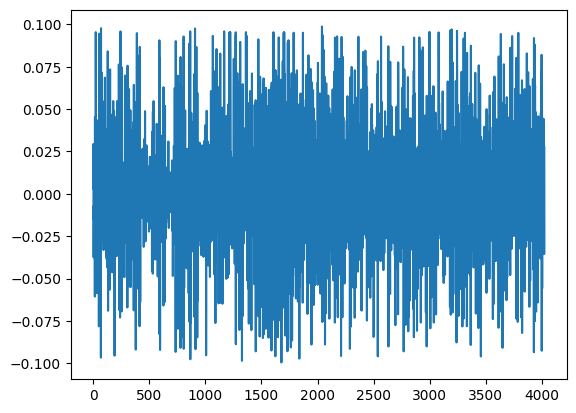

In [11]:
data_600809 = stock_data[stock_data['code'] == 600809].copy()
data_600809.sort_values(by=['date'], inplace=True)
data_600809['r'] = np.log(data_600809['close']) - np.log(data_600809['close'].shift())
data_600809.dropna(inplace=True)
mask = (data_600809['r'] <= 0.1) & (data_600809['r'] >= -0.1)
data_600809 = data_600809[mask]
plt.plot(data_600809['r'].values)

data_600809

### 读入另一只股票和指数的数据

In [12]:
data_600519 = pd.read_csv(
    '../../实验二/assets/data/market/600519_daily.csv',
    encoding='gbk',
    usecols=[1, 5, 10]
)

data_600519

,日期_Date,收盘价_Clpr,日无风险收益率_DRfRet
0,2001/8/27,35.55,0.000054
1,2001/8/28,36.86,0.000054
2,2001/8/29,36.38,0.000054
3,2001/8/30,37.10,0.000054
4,2001/8/31,37.01,0.000054
...,...,...,...
4232,2018/12/24,568.00,0.000088
4233,2018/12/25,565.79,0.000090
4234,2018/12/26,560.08,0.000091
4235,2018/12/27,563.00,0.000091


In [13]:
data_600519.columns=['date', 'close', 'rf']
data_600519.dropna(inplace=True)
data_600519['r'] = np.log(data_600519['close']) - np.log(data_600519['close'].shift())
data_600519.dropna(inplace=True)
mask = (data_600519['r'] >= -0.1) & (data_600519['r'] <= 0.1)
data_600519 = data_600519[mask]
data_600519

,date,close,rf,r
1,2001/8/28,36.86,0.000054,0.036187
2,2001/8/29,36.38,0.000054,-0.013108
3,2001/8/30,37.10,0.000054,0.019598
4,2001/8/31,37.01,0.000054,-0.002429
5,2001/9/3,36.99,0.000054,-0.000541
...,...,...,...,...
4232,2018/12/24,568.00,0.000088,0.001039
4233,2018/12/25,565.79,0.000090,-0.003898
4234,2018/12/26,560.08,0.000091,-0.010143
4235,2018/12/27,563.00,0.000091,0.005200


In [14]:
index = pd.read_csv(
    '../../实验二/assets/data/market/300_daily.csv',
    encoding='gbk',
    usecols=[1, 5]
)
index.columns = ['date', 'close']
index['r'] = np.log(index['close']) - np.log(index['close'].shift(periods=1))
index.dropna(inplace=True)
mask = (index['r'] >= -0.1) & (index['r'] <= 0.1)
index = index[mask]
index

,date,close,r
1,2005/1/5,992.56,0.009892
2,2005/1/6,983.17,-0.009505
3,2005/1/7,983.96,0.000803
4,2005/1/10,993.88,0.010031
5,2005/1/11,997.13,0.003265
...,...,...,...
3397,2018/12/24,3038.20,0.002901
3398,2018/12/25,3017.28,-0.006909
3399,2018/12/26,3002.03,-0.005067
3400,2018/12/27,2990.51,-0.003845


### 合并所有数据

In [15]:
data = pd.merge(
    left=index[['date', 'r']],
    right=data_600519[['date', 'r']],
    on=['date'],
    how='inner',
    sort=True,
)

data

,date,r_x,r_y
0,2005/1/10,0.010031,0.035932
1,2005/1/11,0.003265,0.001306
2,2005/1/12,-0.000381,0.002608
3,2005/1/13,0.000130,0.005713
4,2005/1/14,-0.008634,-0.018292
...,...,...,...
3321,2018/9/3,-0.003810,0.010593
3322,2018/9/4,0.012588,0.013167
3323,2018/9/5,-0.019742,-0.025886
3324,2018/9/6,-0.010748,-0.021187


In [16]:
data.columns = ['date', 'r_m', 'r_600519']

data = pd.merge(
    left=data,
    right=data_568[['date', 'r']],
    on='date',
    how='inner',
    sort=True
)

data

,date,r_m,r_600519,r
0,2005/1/10,0.010031,0.035932,-0.043485
1,2005/1/11,0.003265,0.001306,0.011050
2,2005/1/12,-0.000381,0.002608,-0.002751
3,2005/1/13,0.000130,0.005713,-0.002759
4,2005/1/14,-0.008634,-0.018292,0.000000
...,...,...,...,...
2999,2018/9/3,-0.003810,0.010593,-0.096490
3000,2018/9/4,0.012588,0.013167,0.003702
3001,2018/9/5,-0.019742,-0.025886,-0.028580
3002,2018/9/6,-0.010748,-0.021187,-0.030890


In [17]:
data.columns = ['date', 'r_m', 'r_600519', 'r_568']

data = pd.merge(
    left=data,
    right=data_596[['date', 'r']],
    on='date',
    how='inner',
    sort=True
)

data

,date,r_m,r_600519,r_568,r
0,2005/1/11,0.003265,0.001306,0.011050,0.001747
1,2005/1/12,-0.000381,0.002608,-0.002751,0.000000
2,2005/1/13,0.000130,0.005713,-0.002759,0.017301
3,2005/1/14,-0.008634,-0.018292,0.000000,-0.006885
4,2005/1/17,-0.021333,-0.000528,-0.016713,-0.035153
...,...,...,...,...,...
2744,2018/9/3,-0.003810,0.010593,-0.096490,-0.057236
2745,2018/9/4,0.012588,0.013167,0.003702,0.000382
2746,2018/9/5,-0.019742,-0.025886,-0.028580,-0.033888
2747,2018/9/6,-0.010748,-0.021187,-0.030890,-0.025989


In [18]:
data.columns = ['date', 'r_m', 'r_600519', 'r_568', 'r_596']

data = pd.merge(
    left=data,
    right=data_858[['date', 'r']],
    on='date',
    how='inner',
    sort=True
)

data

,date,r_m,r_600519,r_568,r_596,r
0,2005/1/11,0.003265,0.001306,0.011050,0.001747,-0.002937
1,2005/1/12,-0.000381,0.002608,-0.002751,0.000000,-0.002946
2,2005/1/13,0.000130,0.005713,-0.002759,0.017301,-0.004435
3,2005/1/14,-0.008634,-0.018292,0.000000,-0.006885,0.005908
4,2005/1/17,-0.021333,-0.000528,-0.016713,-0.035153,-0.026867
...,...,...,...,...,...,...
2628,2018/9/3,-0.003810,0.010593,-0.096490,-0.057236,-0.092122
2629,2018/9/4,0.012588,0.013167,0.003702,0.000382,0.012827
2630,2018/9/5,-0.019742,-0.025886,-0.028580,-0.033888,-0.030244
2631,2018/9/6,-0.010748,-0.021187,-0.030890,-0.025989,-0.019734


In [19]:
data.columns = ['date', 'r_m', 'r_600519', 'r_568', 'r_596', 'r_858']

data = pd.merge(
    left=data,
    right=data_799[['date', 'r']],
    on='date',
    how='inner',
    sort=True
)

data

,date,r_m,r_600519,r_568,r_596,r_858,r
0,2005/1/11,0.003265,0.001306,0.011050,0.001747,-0.002937,0.005618
1,2005/1/12,-0.000381,0.002608,-0.002751,0.000000,-0.002946,0.049190
2,2005/1/13,0.000130,0.005713,-0.002759,0.017301,-0.004435,0.005319
3,2005/1/14,-0.008634,-0.018292,0.000000,-0.006885,0.005908,0.007926
4,2005/1/17,-0.021333,-0.000528,-0.016713,-0.035153,-0.026867,-0.026668
...,...,...,...,...,...,...,...
2437,2018/9/3,-0.003810,0.010593,-0.096490,-0.057236,-0.092122,-0.042731
2438,2018/9/4,0.012588,0.013167,0.003702,0.000382,0.012827,0.000000
2439,2018/9/5,-0.019742,-0.025886,-0.028580,-0.033888,-0.030244,-0.024436
2440,2018/9/6,-0.010748,-0.021187,-0.030890,-0.025989,-0.019734,-0.022353


In [20]:
data.columns = ['date', 'r_m', 'r_600519', 'r_568', 'r_596', 'r_858', 'r_799']

data = pd.merge(
    left=data,
    right=data_600809[['date', 'r']],
    on='date',
    how='inner',
    sort=True
)

data.columns = ['date', 'r_m', 'r_600519', 'r_568', 'r_596', 'r_858', 'r_799', 'r_600809']

data

,date,r_m,r_600519,r_568,r_596,r_858,r_799,r_600809
0,2005/1/11,0.003265,0.001306,0.011050,0.001747,-0.002937,0.005618,-0.001596
1,2005/1/12,-0.000381,0.002608,-0.002751,0.000000,-0.002946,0.049190,0.001596
2,2005/1/13,0.000130,0.005713,-0.002759,0.017301,-0.004435,0.005319,-0.004796
3,2005/1/14,-0.008634,-0.018292,0.000000,-0.006885,0.005908,0.007926,0.004796
4,2005/1/17,-0.021333,-0.000528,-0.016713,-0.035153,-0.026867,-0.026668,-0.009615
...,...,...,...,...,...,...,...,...
2394,2018/9/3,-0.003810,0.010593,-0.096490,-0.057236,-0.092122,-0.042731,-0.017277
2395,2018/9/4,0.012588,0.013167,0.003702,0.000382,0.012827,0.000000,0.024651
2396,2018/9/5,-0.019742,-0.025886,-0.028580,-0.033888,-0.030244,-0.024436,-0.030909
2397,2018/9/6,-0.010748,-0.021187,-0.030890,-0.025989,-0.019734,-0.022353,-0.035478


In [21]:
# 合并rf
rf = stock_data[['date', 'rf']].copy()
rf.drop_duplicates(
    inplace=True,
    subset=['date']
) # 删除日期重复的行，因为stock_data有5个不同的股票，但是每天的无风险利率都是一样的

rf.sort_values(
    by=['date'],
    inplace=True
)

data = pd.merge(
    left=data,
    right=rf[['date', 'rf']],
    on=['date'],
    how='inner',
    sort=True,
)

data.columns = ['date', 'r_m', 'r_600519', 'r_568', 'r_596', 'r_858', 'r_799', 'r_600809', 'r_f']

In [22]:
data

,date,r_m,r_600519,r_568,r_596,r_858,r_799,r_600809,r_f
0,2005/1/11,0.003265,0.001306,0.011050,0.001747,-0.002937,0.005618,-0.001596,0.000071
1,2005/1/12,-0.000381,0.002608,-0.002751,0.000000,-0.002946,0.049190,0.001596,0.000071
2,2005/1/13,0.000130,0.005713,-0.002759,0.017301,-0.004435,0.005319,-0.004796,0.000069
3,2005/1/14,-0.008634,-0.018292,0.000000,-0.006885,0.005908,0.007926,0.004796,0.000069
4,2005/1/17,-0.021333,-0.000528,-0.016713,-0.035153,-0.026867,-0.026668,-0.009615,0.000069
...,...,...,...,...,...,...,...,...,...
2394,2018/9/3,-0.003810,0.010593,-0.096490,-0.057236,-0.092122,-0.042731,-0.017277,0.000079
2395,2018/9/4,0.012588,0.013167,0.003702,0.000382,0.012827,0.000000,0.024651,0.000079
2396,2018/9/5,-0.019742,-0.025886,-0.028580,-0.033888,-0.030244,-0.024436,-0.030909,0.000078
2397,2018/9/6,-0.010748,-0.021187,-0.030890,-0.025989,-0.019734,-0.022353,-0.035478,0.000078


### 模型检验

In [23]:
# 超额收益率，替换原本data中的所有数据
data['r_m'] = data['r_m'] - data['r_f']
data['r_600519'] = data['r_600519']  - data['r_f']
data['r_568'] = data['r_568'] - data['r_f']
data['r_596'] = data['r_596'] - data['r_f']
data['r_799'] = data['r_799'] - data['r_f']
data['r_858'] = data['r_858'] - data['r_f']
data['r_600809'] = data['r_600809'] - data['r_f']

data

,date,r_m,r_600519,r_568,r_596,r_858,r_799,r_600809,r_f
0,2005/1/11,0.003194,0.001235,0.010979,0.001676,-0.003008,0.005547,-0.001667,0.000071
1,2005/1/12,-0.000452,0.002537,-0.002822,-0.000071,-0.003017,0.049119,0.001525,0.000071
2,2005/1/13,0.000061,0.005644,-0.002828,0.017232,-0.004504,0.005250,-0.004865,0.000069
3,2005/1/14,-0.008703,-0.018361,-0.000069,-0.006954,0.005839,0.007857,0.004727,0.000069
4,2005/1/17,-0.021402,-0.000597,-0.016782,-0.035222,-0.026936,-0.026737,-0.009684,0.000069
...,...,...,...,...,...,...,...,...,...
2394,2018/9/3,-0.003889,0.010514,-0.096569,-0.057315,-0.092201,-0.042810,-0.017356,0.000079
2395,2018/9/4,0.012509,0.013088,0.003623,0.000303,0.012748,-0.000079,0.024572,0.000079
2396,2018/9/5,-0.019820,-0.025964,-0.028658,-0.033966,-0.030322,-0.024514,-0.030987,0.000078
2397,2018/9/6,-0.010826,-0.021265,-0.030968,-0.026067,-0.019812,-0.022431,-0.035556,0.000078


In [24]:
# 提取模型变量
r_m = data['r_m'].values
T = len(r_m) # T 期数据
N = 6 # 6只股票

# 均值
mu_market = np.mean(r_m)
# 方差
sigma_market = np.sum(
    (r_m - mu_market) ** 2 / T
)

r_stocks = data[['r_600519', 'r_568', 'r_596', 'r_858', 'r_799', 'r_600809']].values

In [25]:
# 无限制capm拟合

# x矩阵：T x 2, 一列1（常数项）， 一列市场超额收益率
x = np.ones(
    (T , 2)
)

x[:, 1] = r_m
'''
[1, 市场超额收益率1]
[1, 市场超额收益率2]
...
[1, 市场超额收益率T]
'''


y = r_stocks

# x的转置和x相乘，得 2x2 矩阵
xTx = np.dot(
    np.transpose(x), x
)

# x的转置和y相乘，得 2xN 矩阵
xTy = np.dot(
    np.transpose(x), y
)

# (X'X)^(-1)X'Y
# 最小二乘法回归的系数矩阵
AB_hat  = np.dot(
    np.linalg.inv(xTx),  # (X'X)^(-1)
    xTy # X'Y
)

ALPHA = AB_hat[0]
print(f'α：{ALPHA}\n')
BETA = AB_hat[1]
print(f'β：{BETA}\n')

# 预测误差：真实值 - 预测值
RESD = y - np.dot(x, AB_hat)

# 协方差矩阵，除以样本数T标准化
COV = np.dot(
    np.transpose(RESD), RESD
) / T

# 协方差矩阵的逆
invCOV = np.linalg.inv(COV)

α：[0.00085853 0.00073681 0.00040755 0.00032307 0.00019614 0.00094523]

β：[0.61562079 0.79055808 0.77988043 0.81298903 0.8194964  0.80297104]



In [26]:
# 限制模型，令α不存在

# x矩阵：T x 1, 一列市场超额收益率
xr = np.ones(
    (T , 1)
)

xr[:, 0] = r_m

yr = r_stocks

xrTxr = np.dot(
    np.transpose(xr), xr
)

xrTyr = np.dot(
    np.transpose(xr), yr
)

ABr_hat  = np.dot(
    np.linalg.inv(xrTxr),
    xrTyr
)

BETAr = AB_hat[0]
print(f'β：{BETAr}\n')

RESDr = y - np.dot(xr, ABr_hat)

COVr = np.dot(
    np.transpose(RESDr), RESDr
) / T

invCOVr = np.linalg.inv(COVr)

β：[0.00085853 0.00073681 0.00040755 0.00032307 0.00019614 0.00094523]



In [27]:
# Wald 检验
# 检验所有α是否显著不为0
trans_ALPHA = np.ones((len(ALPHA), 1))
trans_ALPHA[:, 0] = ALPHA

SWchi2 = T*(1/(1+mu_market**2/sigma_market))*np.dot(np.dot(ALPHA, invCOV), trans_ALPHA)
SWF = (T-N-1)/N*(1/(1+mu_market**2/sigma_market))*np.dot(np.dot(ALPHA, invCOV), trans_ALPHA)

pvalue_Wchi2 = 1 - chi2.cdf(SWchi2[0], N)
pvalue_WF = 1 - f.cdf(SWF[0], N, T-N-1)

print(pvalue_Wchi2)
print(pvalue_WF)

0.22729881001086605
0.22947811063064638


In [28]:
# 似然比检验
SLRchi2 = T*(np.log(np.linalg.det(COVr)) - np.log(np.linalg.det(COV)))
pvalue_SLRchi2 = 1 - chi2.cdf(SLRchi2, N)
print(pvalue_SLRchi2)

0.22827487861682594


In [29]:
# 拉格朗日乘子检验
a = np.zeros((6, 1))
a[:, 0] =  np.sum(RESDr, axis=0)
salpha = np.dot(invCOVr, a)
b = np.dot(r_m, RESDr)
sbeta = np.zeros((6,1))
sbeta[:, 0] = np.dot(invCOVr, b)
score = np.concatenate((salpha, sbeta), axis=0)
print(score)

a = np.concatenate((invCOVr*T, invCOVr*np.sum(r_m)), axis=1)
b = np.concatenate((invCOVr*np.sum(r_m), invCOVr*np.sum(r_m**2)), axis=1)
Minfo = np.concatenate((a, b), axis=0)
SLMchi2 = np.dot(np.dot(np.transpose(score), np.linalg.inv(Minfo)), score)
pvalue_SLMchi2 = 1-chi2.cdf(SLMchi2[0][0], N)
print(pvalue_SLMchi2)

[[ 6.50934791e+03]
 [ 1.74451524e+03]
 [-2.13467320e+02]
 [-2.38805827e+03]
 [-1.01216641e+03]
 [ 2.43947469e+03]
 [ 1.64365164e-13]
 [-1.31664918e-13]
 [ 3.67840986e-13]
 [ 2.08687126e-13]
 [ 3.90040631e-13]
 [-6.69434007e-13]]
0.22925216440362384


# CAPM检验方法详解

资本资产定价模型(CAPM)的检验本质上是检验资产的超额收益率是否仅由市场风险溢价驱动。在统计上，这相当于检验截距项α是否为零。

## 数学公式与检验逻辑

CAPM模型可以表示为：

$$r_{it} - r_{ft} = \alpha_i + \beta_i(r_{mt} - r_{ft}) + \varepsilon_{it}$$

其中：
- $r_{it}$ 是资产i在t期的收益率
- $r_{ft}$ 是无风险收益率
- $r_{mt}$ 是市场收益率
- $\alpha_i$ 是截距项(理论上应为零)
- $\beta_i$ 是资产对市场风险的敏感度
- $\varepsilon_{it}$ 是残差项

CAPM理论认为市场是有效的，没有资产能持续获得超过其风险水平的收益，因此截距项α应该为零。

检验假设：
- 原假设 H₀: α₁ = α₂ = ... = αₙ = 0
- 备择假设 H₁: 至少有一个αᵢ ≠ 0

## 三种检验方法

### 1. Wald检验

Wald检验是一种参数检验方法，用于检验参数估计值与假设值是否有显著差异。

**数学公式**：
$$SW_{\chi^2} = T \cdot \frac{1}{1 + \mu_m^2 / \sigma_m^2} \cdot \alpha' \Sigma^{-1} \alpha$$

$$SW_F = \frac{T-N-1}{N} \cdot \frac{1}{1 + \mu_m^2 / \sigma_m^2} \cdot \alpha' \Sigma^{-1} \alpha$$

其中：
- $T$ 是样本容量
- $N$ 是资产数量
- $\mu_m$ 是市场超额收益率的均值
- $\sigma_m^2$ 是市场超额收益率的方差
- $\alpha$ 是alpha值的向量
- $\Sigma$ 是残差协方差矩阵

### 2. 似然比检验

似然比检验比较无限制模型和限制模型的拟合优度。

**数学公式**：
$$SLR_{\chi^2} = T \cdot (\ln|\Sigma_r| - \ln|\Sigma|)$$

其中：
- $\Sigma_r$ 是限制模型(α=0)的残差协方差矩阵
- $\Sigma$ 是无限制模型的残差协方差矩阵
- $|\Sigma|$ 表示矩阵的行列式

### 3. 拉格朗日乘子检验

拉格朗日乘子检验基于限制模型的得分向量和信息矩阵。

**数学公式**：
$$SLM_{\chi^2} = score' \cdot M_{info}^{-1} \cdot score$$

其中：
- $score$ 是得分向量
- $M_{info}$ 是信息矩阵

## 简化示例

让我们用一个简化示例来解释这些检验。假设我们有:
- 3个时间点(T=3)
- 2只股票(N=2)

### 示例数据

```python
import numpy as np
from scipy.stats import chi2, f

# 市场超额收益率
ret_ind = np.array([0.01, 0.02, -0.01])

# 两只股票的超额收益率
ret_stocks = np.array([
    [0.015, 0.005],  # 时间1，股票1和2
    [0.025, 0.015],  # 时间2，股票1和2
    [-0.005, -0.02]  # 时间3，股票1和2
])

T = len(ret_ind)  # 样本容量T = 3
N = ret_stocks.shape[1]  # 股票数量N = 2

# 计算市场超额收益率的均值和方差
mu_market = np.mean(ret_ind)
sigma_market = np.sum((ret_ind - mu_market)**2) / T
```

### 无限制模型与限制模型

```python
# 无限制模型（包含α）
x = np.ones((T, 2))
x[:, 1] = ret_ind
y = ret_stocks

xTx = np.dot(np.transpose(x), x)
xTy = np.dot(np.transpose(x), y)
AB_hat = np.dot(np.linalg.inv(xTx), xTy)

ALPHA = AB_hat[0]  # 截距项α
BETA = AB_hat[1]   # 斜率系数β

print("Alpha值:", ALPHA)
print("Beta值:", BETA)

# 计算残差和协方差矩阵
RESD = y - np.dot(x, AB_hat)
COV = np.dot(np.transpose(RESD), RESD) / T
invCOV = np.linalg.inv(COV)

# 限制模型（α=0）
xr = np.ones((T, 1))
xr[:, 0] = ret_ind
yr = ret_stocks

xrTxr = np.dot(np.transpose(xr), xr)
xrTyr = np.dot(np.transpose(xr), yr)
Br_hat = np.dot(np.linalg.inv(xrTxr), xrTyr)  # 只有β

print("限制模型Beta值:", Br_hat)

# 计算限制模型的残差和协方差矩阵
RESDr = yr - np.dot(xr, Br_hat)
COVr = np.dot(np.transpose(RESDr), RESDr) / T
invCOVr = np.linalg.inv(COVr)
```

### 实施三种检验

```python
# 1. Wald检验
trans_ALPHA = np.ones((len(ALPHA), 1))
trans_ALPHA[:, 0] = ALPHA

# 计算检验统计量
SWchi2 = T * (1 / (1 + mu_market**2 / sigma_market)) * np.dot(np.dot(ALPHA, invCOV), trans_ALPHA)
SWF = (T - N - 1) / N * (1 / (1 + mu_market**2 / sigma_market)) * np.dot(np.dot(ALPHA, invCOV), trans_ALPHA)

# 计算p值
pvalue_Wchi2 = 1 - chi2.cdf(SWchi2[0], N)
pvalue_WF = 1 - f.cdf(SWF[0], N, T - N - 1)

print("Wald卡方检验p值:", pvalue_Wchi2)
print("Wald F检验p值:", pvalue_WF)

# 2. 似然比检验
SLRchi2 = T * (np.log(np.linalg.det(COVr)) - np.log(np.linalg.det(COV)))
pvalue_SLRchi2 = 1 - chi2.cdf(SLRchi2, N)

print("似然比检验p值:", pvalue_SLRchi2)

# 3. 拉格朗日乘子检验
# 计算得分向量
a = np.zeros((N, 1))
a[:, 0] = np.sum(RESDr, axis=0)
salpha = np.dot(invCOVr, a)

b = np.dot(ret_ind, RESDr)
sbeta = np.zeros((N, 1))
sbeta[:, 0] = np.dot(invCOVr, b)

score = np.concatenate((salpha, sbeta), axis=0)

# 构建信息矩阵
a = np.concatenate((invCOVr * T, invCOVr * np.sum(ret_ind)), axis=1)
b = np.concatenate((invCOVr * np.sum(ret_ind), invCOVr * np.sum(ret_ind**2)), axis=1)
Minfo = np.concatenate((a, b), axis=0)

# 计算检验统计量
SLMchi2 = np.dot(np.dot(np.transpose(score), np.linalg.inv(Minfo)), score)
pvalue_SLMchi2 = 1 - chi2.cdf(SLMchi2[0][0], N)

print("拉格朗日乘子检验p值:", pvalue_SLMchi2)
```

## 代码详解

### 1. Wald检验解析

Wald检验直接使用无限制模型中估计的α值，检验它们是否显著不为零。

```python
# Wald检验
trans_ALPHA = np.ones((len(ALPHA), 1))  # 创建一个列向量来存储α值
trans_ALPHA[:, 0] = ALPHA                # 将α值存入列向量

# 计算检验统计量
# 调整因子 1/(1+μ²/σ²) 考虑了市场风险的影响
# α'Σ⁻¹α 是一个二次型，衡量α与零向量的"距离"
SWchi2 = T * (1 / (1 + mu_market**2 / sigma_market)) * np.dot(np.dot(ALPHA, invCOV), trans_ALPHA)
# F统计量是卡方统计量的一个变形
SWF = (T - N - 1) / N * (1 / (1 + mu_market**2 / sigma_market)) * np.dot(np.dot(ALPHA, invCOV), trans_ALPHA)

# 计算p值
# 在原假设下，统计量近似服从自由度为N的卡方分布
pvalue_Wchi2 = 1 - chi2.cdf(SWchi2[0], N)
# 或者服从自由度为N和T-N-1的F分布
pvalue_WF = 1 - f.cdf(SWF[0], N, T - N - 1)
```

### 2. 似然比检验解析

似然比检验比较限制模型和无限制模型的拟合优度。如果两个模型的拟合差异不大，说明限制（α=0）是合理的。

```python
# 似然比检验
# |Σᵣ|和|Σ|分别是限制模型和无限制模型残差协方差矩阵的行列式
# 行列式的比值反映了模型拟合的差异
SLRchi2 = T * (np.log(np.linalg.det(COVr)) - np.log(np.linalg.det(COV)))
# 在原假设下，统计量近似服从自由度为N的卡方分布
pvalue_SLRchi2 = 1 - chi2.cdf(SLRchi2, N)
```

### 3. 拉格朗日乘子检验解析

拉格朗日乘子检验基于限制模型的得分和信息矩阵，检验限制是否合理。

```python
# 拉格朗日乘子检验
# 1. 计算得分向量的α部分
a = np.zeros((N, 1))
a[:, 0] = np.sum(RESDr, axis=0)  # 限制模型残差的和
salpha = np.dot(invCOVr, a)       # 通过协方差矩阵加权

# 2. 计算得分向量的β部分
b = np.dot(ret_ind, RESDr)        # 市场超额收益率与残差的乘积
sbeta = np.zeros((N, 1))
sbeta[:, 0] = np.dot(invCOVr, b)   # 通过协方差矩阵加权

# 3. 合并得分向量
score = np.concatenate((salpha, sbeta), axis=0)

# 4. 构建信息矩阵 
a = np.concatenate((invCOVr * T, invCOVr * np.sum(ret_ind)), axis=1)
b = np.concatenate((invCOVr * np.sum(ret_ind), invCOVr * np.sum(ret_ind**2)), axis=1)
Minfo = np.concatenate((a, b), axis=0)

# 5. 计算检验统计量 score'·M⁻¹·score
SLMchi2 = np.dot(np.dot(np.transpose(score), np.linalg.inv(Minfo)), score)
# 在原假设下，统计量近似服从自由度为N的卡方分布
pvalue_SLMchi2 = 1 - chi2.cdf(SLMchi2[0][0], N)
```

## 结果解释

在以上三种检验中，如果p值大于显著性水平（通常为0.05），则无法拒绝"所有α同时为零"的原假设，这意味着CAPM模型在统计上是有效的。

在原代码中，三种检验的p值都约为0.22，大于0.05，因此无法拒绝原假设，这支持了CAPM理论在所研究的中国股市样本中可能是有效的。

这三种检验方法在理论上是等价的，但在有限样本下可能会有细微差异。使用多种方法进行检验可以增强结论的可靠性。